# Pandas: Python Data Anaylsis Library

[Pandas](https://pandas.pydata.org/) is a library for working with and manipulating tabular style data.  In many ways you can think of it as a replacement for a spreadsheet only it's much more powerful.  Whereas [NumPy](https://numpy.org/) provides $N$-dimensional data structures, Pandas is best utilized on two-dimensional, *labeled* data.  The fundamental data structures in Pandas are the `Series` and the `Dataframe`.  

A Pandas Series contains a single column of data and an *index*.  The index is a way to reference the rows of data in the Series.  Common examples of an index would be simply a monotonically increasing set of integers, or time/date stamps for time series data.

A Pandas DataFrame can be thought of being created by combining more than one Series that share a common index.  So a table with multiple column labels and common index would be an example of a DataFrame.  The description of these data structures will be made clear through examples in the sequel.

Similarly to the way we import NumPy, it's idiomatic Python to import Pandas as

```python
import pandas as pd
```

In [1]:
import numpy as np
import pandas as pd

## Loading Data 

Pandas offers some of the best utilities available for reading/parsing data from text files. The function [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) has numerous options for managing header/footer lines in files, parsing dates, selecting specific columns, etc in comma separated value (CSV) files.  The default index for the Dataframe is set to a set of monotonically increasing integers unless otherwise specified with the keyword argument `index_col`.

There are similar functions for reading Microsoft Excel spreadsheets ([`read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)) and fixed width formatted text  ([`read_fwf`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html#pandas.read_fwf)).

The file `'200wells.csv'` contains a dataset with X and Y coordinates, facies 1 and 2 (1 is sandstone and 2 interbedded sand and mudstone), porosity , permeability (mD) and acoustic impedance ($\mbox{kg} / (\mbox{m}^2 \cdot \mbox{s} \cdot 10^6)$).

The [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) member function for DataFrames displays the first 5 rows of the DataFrame.  Optionally, you can specify an argument (e.g. `head(n=10)` to display more/less rows

In [2]:
df = pd.read_csv('datasets/200wells.csv')
df.head()

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


## Summary Statistics

The DataFrame member function [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) provides useful summary statistics such as the total number of samples, mean, standard deviations, min/max, and quartiles for each column of the DataFrame. 

In [3]:
df.describe()

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,2053.400000,1876.15000,1.330000,0.149300,25.287462,3.000435
std,1113.524641,1137.58016,0.471393,0.032948,64.470135,0.592201
min,25.000000,35.00000,1.000000,0.050000,0.015820,2.009000
25%,1112.500000,920.00000,1.000000,0.132175,1.366750,2.483250
50%,2160.000000,1855.00000,1.000000,0.150150,4.825500,2.964500
75%,2915.000000,2782.50000,2.000000,0.174200,14.597000,3.527000
max,3955.000000,3995.00000,2.000000,0.223200,463.641000,3.984000


## Indexing and Selecting Data

We can access parts of the DataFrame by their labels or their numerical indices. The most basic and useful operation is to select an entire column of data by it's label.

In [4]:
df[['porosity']].head()

,porosity
0,0.1184
1,0.1566
2,0.1920
3,0.1621
4,0.1766


Multiple columns can be selected by passing in a list of labels.

In [5]:
df[['porosity', 'permeability']].head()

,porosity,permeability
0,0.1184,6.170
1,0.1566,6.275
2,0.1920,92.297
3,0.1621,9.048
4,0.1766,7.123


### Label based selection

The member function [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) can be used to select both rows and columns of data by their labels.  The index is interpreted as the row label.

In [6]:
df.loc[1:2, ['porosity', 'permeability']]

,porosity,permeability
1,0.1566,6.275
2,0.1920,92.297


`loc` support NumPy-style *slicing* notation to select sequences of labels.

In [7]:
df.loc[1:2, 'porosity':'acoustic_impedance']

,porosity,permeability,acoustic_impedance
1,0.1566,6.275,2.864
2,0.1920,92.297,3.524


### Index based selection

The member function [`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) can be used to select both rows and columns of data by their integer index.  `iloc` supports Python-list style slicing.

In [8]:
df.iloc[1:3, 3:5]

,porosity,permeability
1,0.1566,6.275
2,0.1920,92.297


## DataFrame Transformations

There are several member functions that allow for transformations of the DataFrame labels, adding/removing columns, etc.

To rename DataFrame column labels, we pass a Python dictionary where the keywords are the current labels and the values are the new labels.  For example,

The use of the keyword argument `inplace = True` has an equivalent outcome as writing

```python
df = df.rename(...
```

In [9]:
df.rename(columns={'facies_threshold_0.3': 'facies', 
                   'permeability': 'perm', 
                   'acoustic_impedance':'ai'}, inplace = True)
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


### Adding a New Column

Pandas DataFrames share a lot of the same syntax with Python dictionaries including accessing columns by label (i.e. keyword) and adding entries.  The example below shows how to add a new column with the label `'zero'`.

In [10]:
df['zero'] = np.zeros(len(df)) 
df.head()

,X,Y,facies,porosity,perm,ai,zero
0,565,1485,1,0.1184,6.170,2.009,0.0
1,2585,1185,1,0.1566,6.275,2.864,0.0
2,2065,2865,2,0.1920,92.297,3.524,0.0
3,3575,2655,1,0.1621,9.048,2.157,0.0
4,1835,35,1,0.1766,7.123,3.979,0.0


### Removing Columns 

We can remove unwanted columns with the [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) member function. The argument `inplace = True` modifies the existing DataFrame in place in memory, i.e. `'zero'` will no longer be accessible in any way in the DataFrame.

The argument `axis = 1` refers to columns, the default is `axis = 0` in which case the positional argument would be expected to be an index label.

In [11]:
df.drop('zero', axis=1, inplace=True)
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


### Removing Rows

We can remove the row indexed by `1` as follows.

Notice we can stack member function commands, i.e. the `drop` function is immediately followed by `head` to display the DataFrame with row index `1` removed.

In [12]:
df.drop(1).head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979
5,3375,2525,1,0.1239,1.468,2.337


Because the argument `inplace = True` was not given, the orginal DataFrame is unchanged.  

In [13]:
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


### Sorting

We can sort the DataFrame in either ascending or desending order by any column label.

In [14]:
df.sort_values('porosity', ascending = False, inplace = True)
df.head(n=13)

,X,Y,facies,porosity,perm,ai
38,3505,1525,2,0.2232,174.654,3.344
117,2665,3205,2,0.2159,273.980,2.551
164,2455,2885,2,0.2158,9.592,2.773
148,1975,2745,2,0.2158,361.704,3.839
97,1855,3025,2,0.2154,463.641,3.091
26,1785,3145,2,0.2150,201.363,2.877
171,3735,2585,1,0.2063,30.258,2.100
51,1655,2985,2,0.2062,17.585,3.444
138,1855,3095,2,0.2019,257.990,2.886
63,845,3915,1,0.1982,410.570,2.781


### Reseting Indices

In the previous example, the resulting indices are now out of order after the sorting operation.  This can be fixed, if desired, with the [`reset_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) member function.

The reindexing operation could have been accomplished during the sort operation by passing the argument `ingnore_index = True`.

In [15]:
df.reset_index(inplace = True, drop = True)
df.head(n = 13)

,X,Y,facies,porosity,perm,ai
0,3505,1525,2,0.2232,174.654,3.344
1,2665,3205,2,0.2159,273.980,2.551
2,2455,2885,2,0.2158,9.592,2.773
3,1975,2745,2,0.2158,361.704,3.839
4,1855,3025,2,0.2154,463.641,3.091
5,1785,3145,2,0.2150,201.363,2.877
6,3735,2585,1,0.2063,30.258,2.100
7,1655,2985,2,0.2062,17.585,3.444
8,1855,3095,2,0.2019,257.990,2.886
9,845,3915,1,0.1982,410.570,2.781


## Feature Engineering 

In the field of data science, DataFrame column labels are often referred to as *features*.  *Feature engineering* is the process of creating new features and/or transforming features for further analysis.  In the example below, we create two new features through manipulations of existing features.

Mathematical operations can be performed directly on the DataFrame columns that are accessed by their labels.

In [16]:
df['% porosity'] = df['porosity'] * 100
df['perm-por ratio'] = df['perm'] / df['porosity']          
df.head()

,X,Y,facies,porosity,perm,ai,% porosity,perm-por ratio
0,3505,1525,2,0.2232,174.654,3.344,22.32,782.500000
1,2665,3205,2,0.2159,273.980,2.551,21.59,1269.013432
2,2455,2885,2,0.2158,9.592,2.773,21.58,44.448563
3,1975,2745,2,0.2158,361.704,3.839,21.58,1676.107507
4,1855,3025,2,0.2154,463.641,3.091,21.54,2152.465181


### Assigning Conditional Categories

We can also use conditional statements when assigning values to a new feature.  For example, we could have a categorical porosity measure for high and low porosity, called `'porosity type'`.

Most NumPy functions such as [`where`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) will work directly on Pandas DataFrame columns.

In [17]:
df['porosity type'] = np.where(df['porosity'] > 0.12, 'high', 'low')
df[df['porosity type'] == 'high'].head(n = 3)

,X,Y,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type
0,3505,1525,2,0.2232,174.654,3.344,22.32,782.500000,high
1,2665,3205,2,0.2159,273.980,2.551,21.59,1269.013432,high
2,2455,2885,2,0.2158,9.592,2.773,21.58,44.448563,high


In [18]:
df[df['porosity type'] == 'low'].head(n = 3)

,X,Y,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type
165,1365,2715,1,0.1191,0.2666,2.788,11.91,2.238455,low
166,2765,925,1,0.1190,0.7731,2.323,11.90,6.496639,low
167,565,1485,1,0.1184,6.1700,2.009,11.84,52.111486,low


### Feature Truncation

Here's an example where we use a conditional statement to assign a very low permeability value (0.0001 mD) for all porosity values below a threshold. Of course, this is for demonstration, in practice a much lower porosity threshold would likely be applied.  

In [19]:
df['perm cutoff'] = np.where(df['porosity'] > 0.12, df['perm'], 0.0001) 
df.head(n = 3)

,X,Y,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type,perm cutoff
0,3505,1525,2,0.2232,174.654,3.344,22.32,782.500000,high,174.654
1,2665,3205,2,0.2159,273.980,2.551,21.59,1269.013432,high,273.980
2,2455,2885,2,0.2158,9.592,2.773,21.58,44.448563,high,9.592


In [20]:
df[df['perm cutoff'] == 0.0001].head(n = 3)

,X,Y,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type,perm cutoff
165,1365,2715,1,0.1191,0.2666,2.788,11.91,2.238455,low,0.0001
166,2765,925,1,0.1190,0.7731,2.323,11.90,6.496639,low,0.0001
167,565,1485,1,0.1184,6.1700,2.009,11.84,52.111486,low,0.0001


### Missing Features

It's very common in data analysis to have missing and/or invalid values in our our DataFrames.  Pandas offers several built in methods to identify and deal with missing Data.  

First, let's create a missing data point in the `'porosity'` column of `df`.

The [`at`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at) member function allows for fast selection of a single row/label position within a Series/DataFrame.

In [21]:
df.at[1, 'porosity'] = None
df.head(n = 3)

,X,Y,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type,perm cutoff
0,3505,1525,2,0.2232,174.654,3.344,22.32,782.500000,high,174.654
1,2665,3205,2,NaN,273.980,2.551,21.59,1269.013432,high,273.980
2,2455,2885,2,0.2158,9.592,2.773,21.58,44.448563,high,9.592


The [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) member function returns a boolean array that identifies rows with missing values.

In [22]:
df[df['porosity'].isnull()]

,X,Y,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type,perm cutoff
1,2665,3205,2,NaN,273.98,2.551,21.59,1269.013432,high,273.98


### Dropping missing rows

The [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) member function allows us to remove missing rows from the DataFrame.

In [23]:
df.dropna(inplace = True)
df.head(n = 3)

,X,Y,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type,perm cutoff
0,3505,1525,2,0.2232,174.654,3.344,22.32,782.500000,high,174.654
2,2455,2885,2,0.2158,9.592,2.773,21.58,44.448563,high,9.592
3,1975,2745,2,0.2158,361.704,3.839,21.58,1676.107507,high,361.704


## Creating New DataFrames

Up to now, we've utilized a DataFrame that was created by reading in the data from a CSV file.  We can also create DataFrames from scratch.  First we'll create a couple of NumPy arrays with representative data for demonstration.

In [24]:
porosity = np.random.random_sample(100) * 0.2
permeability = 10 * porosity ** 3 / (1 - porosity) ** 2 

Create a Python dictionary where the keywords are the desired DataFrame labels and the values are the associated data.

In [25]:
df_dict = {'porosity': porosity, 'permeability': permeability}

Pass the dictionary as an argument to `pd.Dataframe` to create the DataFrame

In [26]:
df_new = pd.DataFrame(df_dict)
df_new.sort_values('porosity', inplace = True, ignore_index = True)
df_new.head()

,porosity,permeability
0,0.001733,5.226433e-08
1,0.002562,1.691216e-07
2,0.005937,2.117773e-06
3,0.007952,5.109359e-06
4,0.008526,6.304951e-06


## Merging DataFrames

In this example, we'll take a couple subsets from our original DataFrame and create a new one by joining them with the [`concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function.

In [27]:
df1 = df.iloc[0:3,2:]; df1

,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type,perm cutoff
0,2,0.2232,174.654,3.344,22.32,782.500000,high,174.654
2,2,0.2158,9.592,2.773,21.58,44.448563,high,9.592
3,2,0.2158,361.704,3.839,21.58,1676.107507,high,361.704


In [28]:
df2 = df.iloc[10:13,2:]; df2

,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type,perm cutoff
11,2,0.1974,159.567,3.167,19.74,808.343465,high,159.567
12,2,0.1973,114.044,2.750,19.73,578.023315,high,114.044
13,2,0.1965,199.952,2.747,19.65,1017.567430,high,199.952


We could have reindexed with the `ingnore_index = True` keyword argument.

In [29]:
pd.concat([df1, df2], axis = 0)

,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type,perm cutoff
0,2,0.2232,174.654,3.344,22.32,782.500000,high,174.654
2,2,0.2158,9.592,2.773,21.58,44.448563,high,9.592
3,2,0.2158,361.704,3.839,21.58,1676.107507,high,361.704
11,2,0.1974,159.567,3.167,19.74,808.343465,high,159.567
12,2,0.1973,114.044,2.750,19.73,578.023315,high,114.044
13,2,0.1965,199.952,2.747,19.65,1017.567430,high,199.952


## Plotting DataFrames

Pandas has some built in automatic plotting methods for DataFrames. They are most useful for quick-look plots of relationships between DataFrame columns, but they can be fully customized to make publication quality plots with additional options available in the [Matplotlib](https://matplotlib.org/) plotting library.  The default [`plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) member function will create a line plot of all DataFrame labels as functions of the index.

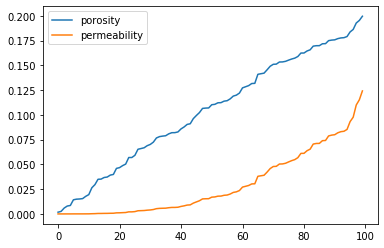

In [30]:
df_new.plot();

Of course, this is not that useful a plot.  What we are likely looking for is a relationship between the DataFrame columns.  One way to visualize this is to set the desired abscissa as the DataFrame index and create a plot. 

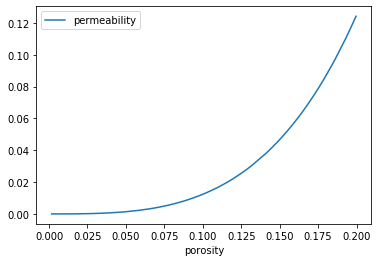

In [31]:
df_new.set_index(['porosity']).plot();

Or explicitly pass the desired independent variable to the `x` keyword arguments and the dependent variable to the `y` keyword argument.  This time we'll also explicitly create a scatter plot.

When the DataFrame columns are explicitly passed as arguments, the axis labels are correctly populated.

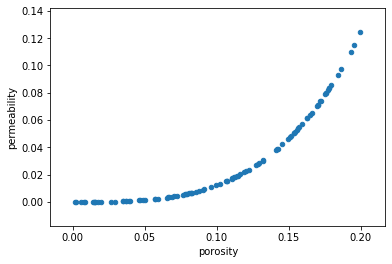

In [32]:
df_new.plot.scatter(x='porosity', y='permeability');

## Writing a DataFrame to a File

The most common way way to store and share DataFrames among different computers is the export the DataFrame to a CSV file.  This is accomplished with the [`to_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) member function.

In [33]:
df.to_csv("datasets/200wells_out.csv", index = False)

Displaying the raw data is the file with the UNIX `head` command

In [34]:
!head -n 5 datasets/200wells_out.csv

X,Y,facies,porosity,perm,ai,% porosity,perm-por ratio,porosity type,perm cutoff
3505,1525,2,0.2232,174.65400000000002,3.344,22.32,782.5000000000001,high,174.65400000000002
2455,2885,2,0.2158,9.592,2.773,21.58,44.44856348470807,high,9.592
1975,2745,2,0.2158,361.704,3.839,21.58,1676.1075069508806,high,361.704
1855,3025,2,0.2154,463.64099999999996,3.091,21.54,2152.4651810584955,high,463.64099999999996


## Further Reading 

Further reading on Pandas is avialable in the [official Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

In [35]:
%%javascript
function hideElements(elements, start) {
for(var i = 0, length = elements.length; i < length;i++) {
    if(i >= start) {
        elements[i].style.display = "none";
    }
}
}
var prompt_elements = document.getElementsByClassName("prompt");
hideElements(prompt_elements, 0)

<IPython.core.display.Javascript object>